In [1]:
from distorsion import CameraCalibration
from perspective import BirdEye, SPOINTS, DPOINTS
from filters import LaneFilter
from curves import CurveCalculation
from helpers import show_dotted_image, show_images, roi

import cv2
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from glob import glob

In [2]:
IMAGE_SET_DIR = 'data/test_images/'

calibration = CameraCalibration()
perspective = BirdEye()
lane_filter = LaneFilter()
curves = CurveCalculation()

test_images = glob(IMAGE_SET_DIR + '*.jpg')

In [3]:
def test_calibration(filename, create_file = False):
    image = imread(filename)
    undistorted_image = calibration.undistort(image)

    show_images([image, undistorted_image], per_row=2, per_col=1)


def test_sky_perspective(filename):
    image = imread(filename)    
    undistorsted_image = calibration.undistort(image)
    sky_image_view = perspective.sky_view(undistorsted_image)
    
    show_dotted_image(sky_image_view, DPOINTS)

def test_normal_perspective(filename):
    image = imread(filename)
    undistorsted_image = calibration.undistort(image)
    
    show_dotted_image(undistorsted_image, SPOINTS)

def test_lane_filter(filename):
    image = cv2.imread(filename)
    undistorsted_image = calibration.undistort(image)
    binary = lane_filter.apply(undistorsted_image)
    masked_lane = np.logical_and(perspective.sky_view(binary), roi(binary))
    sobel_image = perspective.sky_view(lane_filter.sobel_breakdown(undistorsted_image))
    color_image = perspective.sky_view(lane_filter.color_breakdown(undistorsted_image))

    show_images([color_image, sobel_image, masked_lane], per_col=1, per_row=3, W = 15, H = 5)
    

def test_curve_calculation(filename):
    image = imread(filename)
    undistorsted_image = calibration.undistort(image)
    binary = lane_filter.apply(undistorsted_image)
    wb = np.logical_and(perspective.sky_view(binary), roi(binary).astype(np.uint8))
    result = curves.fit(wb)

    print("REAL WORLD: left fit curve parameters:", result['left_curve_fit'])
    print("REAL WORLD: right fit curve parameters:", result['right_curve_fit'])
    print("-------------------------------------------------------------------")
    print("PIXEL: left best-fit curve parameters:", result['left_fit_curve_pix'])
    print("PIXEL: right best-fit curve parameters:", result['right_fit_curve_pix'])
    print("-------------------------------------------------------------------")
    print("LEFT: current radius of curvature:", result['left_radius'], "m")
    print("RIGHT: current radius of curvature:", result['right_radius'], "m")
    print("-------------------------------------------------------------------")
    print("VEHICLE POSITION:", result['position'])

    plt.imshow(result['image'])
    plt.show()

def test_project_lane(filename):
    image = imread(filename)

    undistorsted_image = calibration.undistort(image)
    binary = lane_filter.apply(undistorsted_image)
    wb = np.logical_and(perspective.sky_view(binary), roi(binary).astype(np.uint8))
    result = curves.fit(wb)
    
    image = perspective.project_lane(image, binary, result['left_fit_curve_pix'], result['right_fit_curve_pix'])

    plt.imshow(image)
    plt.show()
    

For imagedata/test_images\special_test1.jpg:


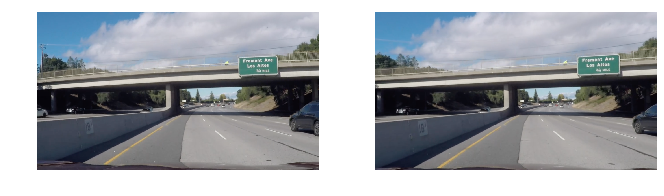

For imagedata/test_images\straight_lines1.jpg:


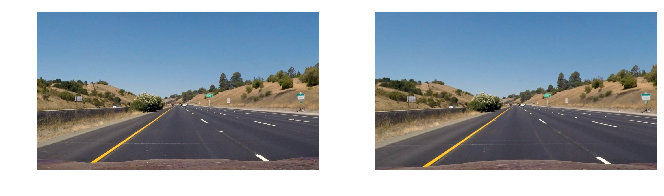

For imagedata/test_images\straight_lines2.jpg:


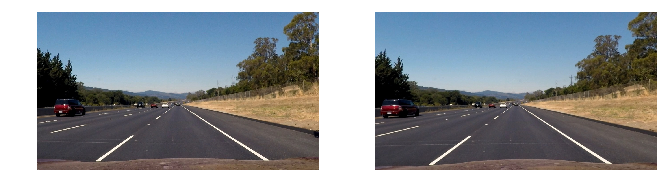

For imagedata/test_images\test1.jpg:


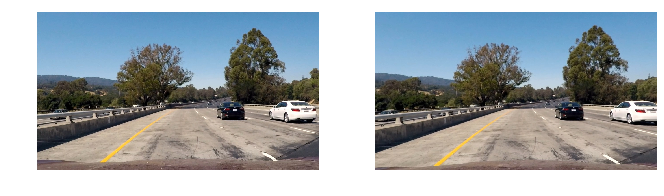

For imagedata/test_images\test2.jpg:


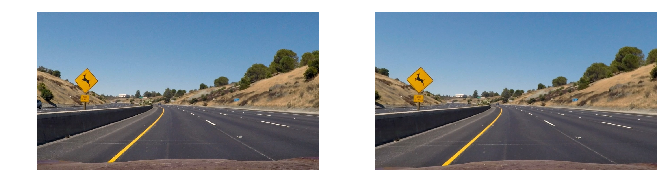

For imagedata/test_images\test3.jpg:


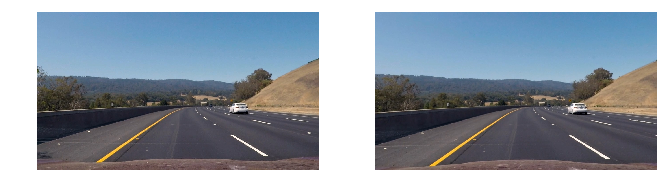

For imagedata/test_images\test4.jpg:


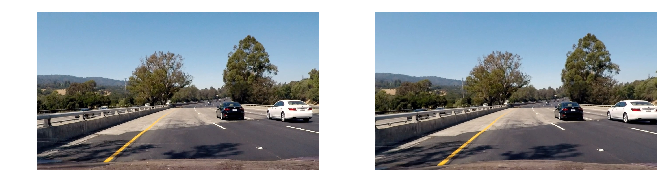

For imagedata/test_images\test5.jpg:


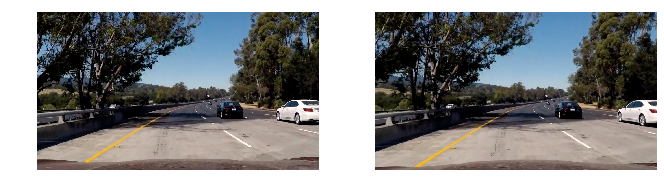

For imagedata/test_images\test6.jpg:


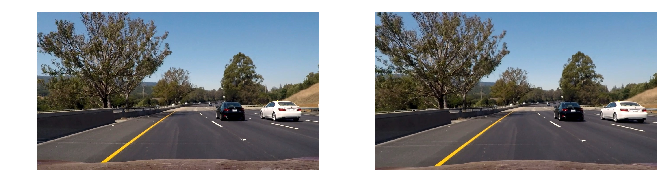

In [94]:
for _, image in enumerate(test_images):
    print('For image' + image + ':')
    test_calibration(image)

For image data/test_images\special_test1.jpg:


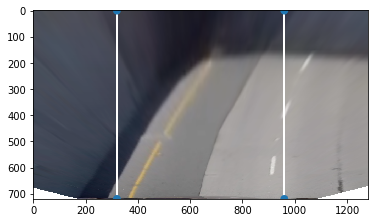

For image data/test_images\straight_lines1.jpg:


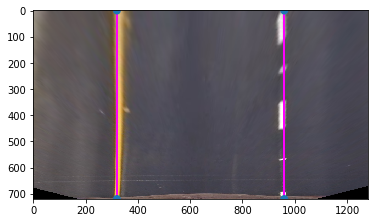

For image data/test_images\straight_lines2.jpg:


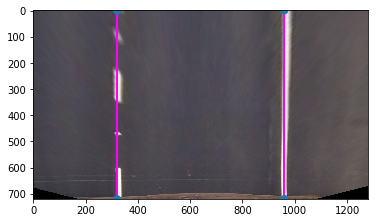

For image data/test_images\test1.jpg:


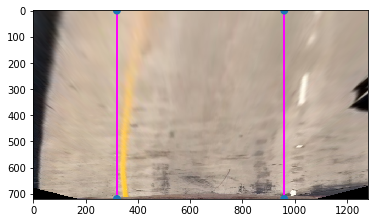

For image data/test_images\test2.jpg:


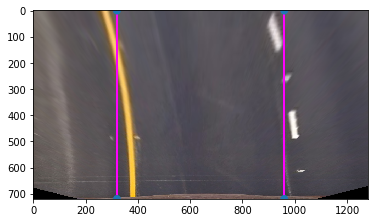

For image data/test_images\test3.jpg:


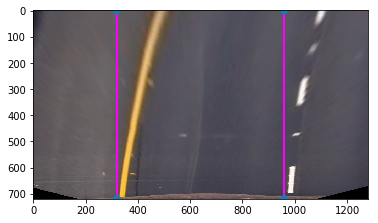

For image data/test_images\test4.jpg:


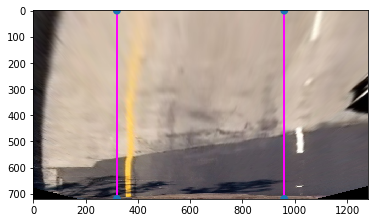

For image data/test_images\test5.jpg:


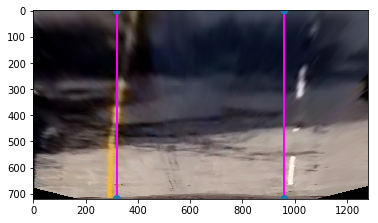

For image data/test_images\test6.jpg:


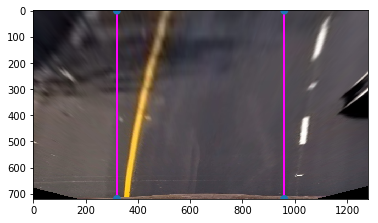

In [95]:
for _, image in enumerate(test_images):
    print('For image ' + image + ':')
    test_sky_perspective(image)

For image data/test_images\special_test1.jpg:


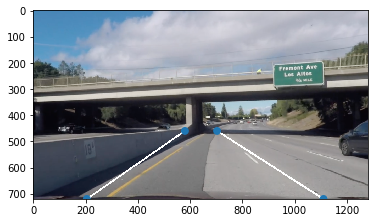

For image data/test_images\straight_lines1.jpg:


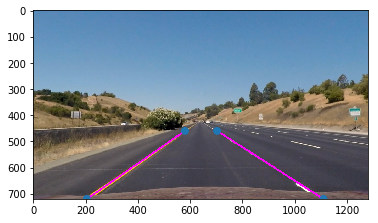

For image data/test_images\straight_lines2.jpg:


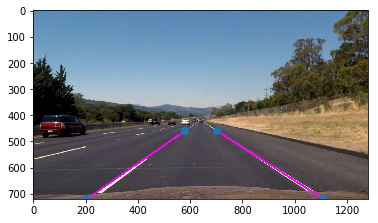

For image data/test_images\test1.jpg:


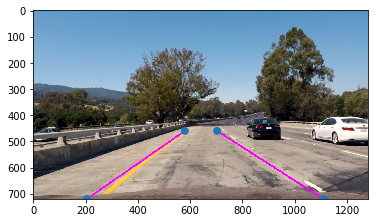

For image data/test_images\test2.jpg:


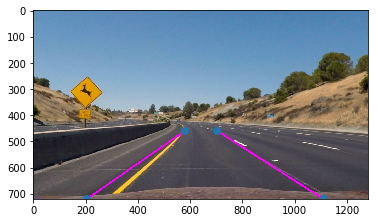

For image data/test_images\test3.jpg:


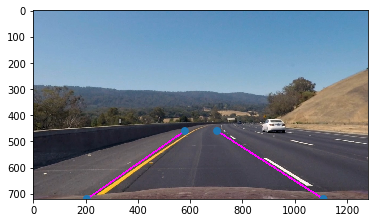

For image data/test_images\test4.jpg:


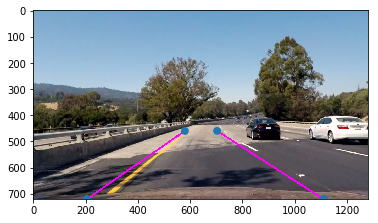

For image data/test_images\test5.jpg:


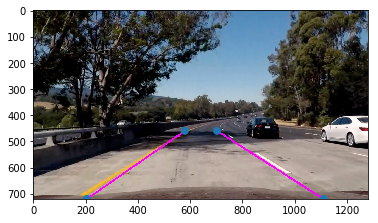

For image data/test_images\test6.jpg:


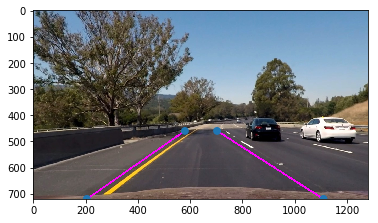

In [96]:
for _, image in enumerate(test_images):
    print('For image ' + image + ':')
    test_normal_perspective(image)

For image data/test_images\special_test1.jpg:


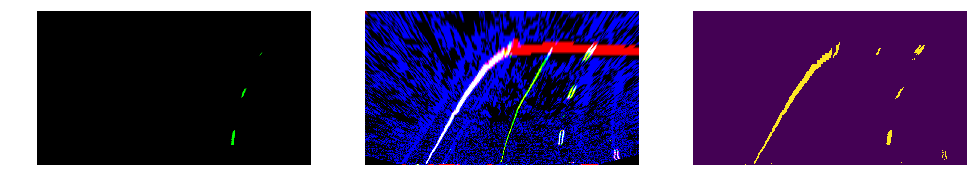

For image data/test_images\straight_lines1.jpg:


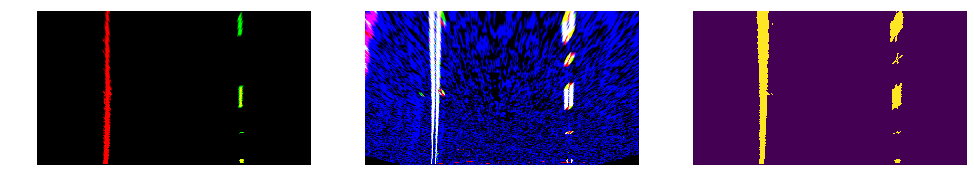

For image data/test_images\straight_lines2.jpg:


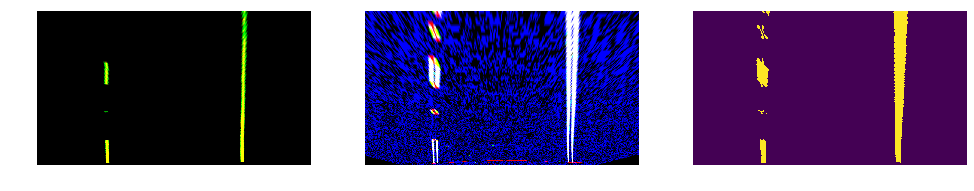

For image data/test_images\test1.jpg:


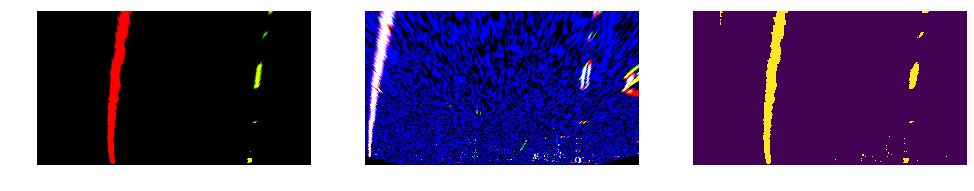

For image data/test_images\test2.jpg:


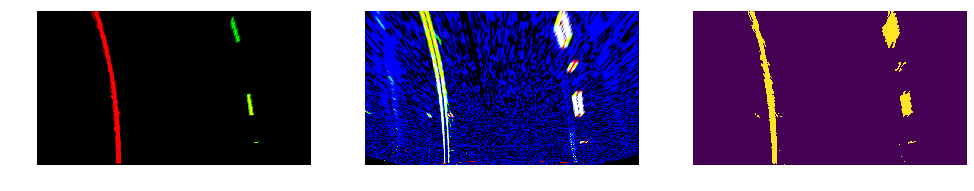

For image data/test_images\test3.jpg:


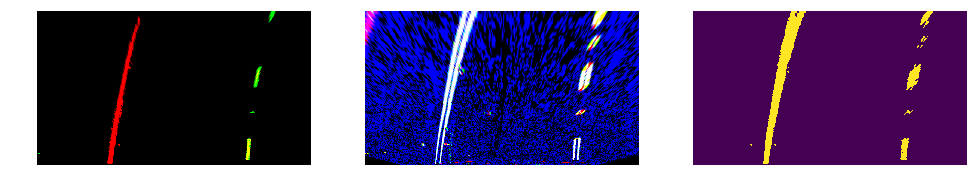

For image data/test_images\test4.jpg:


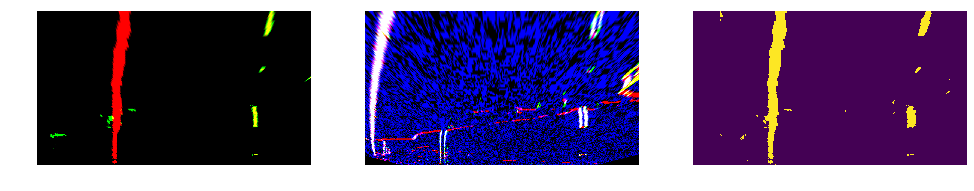

For image data/test_images\test5.jpg:


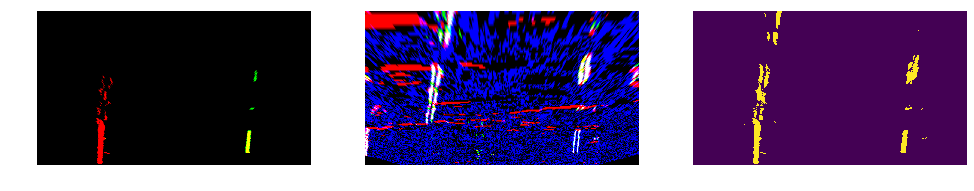

For image data/test_images\test6.jpg:


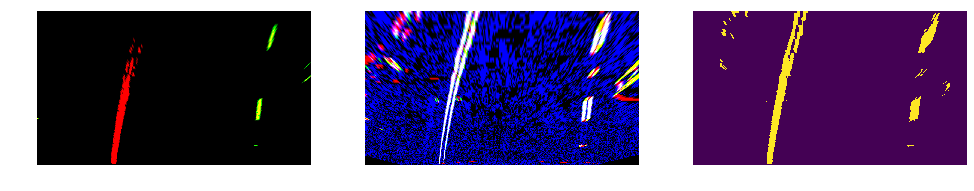

In [97]:
for _, image in enumerate(test_images):
    print('For image ' + image + ':')
    test_lane_filter(image)

For image data/test_images\special_test1.jpg:
REAL WORLD: left fit curve parameters: [ 2.65985674e-03 -1.73155976e-01  4.60079735e+00]
REAL WORLD: right fit curve parameters: [ 7.39403008e-04 -5.86320585e-02  5.84431490e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 8.73639131e-04 -1.36496828e+00  8.70421120e+02]
PIXEL: right best-fit curve parameters: [ 2.42859472e-04 -4.62189651e-01  1.10568120e+03]
-------------------------------------------------------------------
LEFT: current radius of curvature: 188.03193338750276 m
RIGHT: current radius of curvature: 676.4277147154231 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.11m left of center.


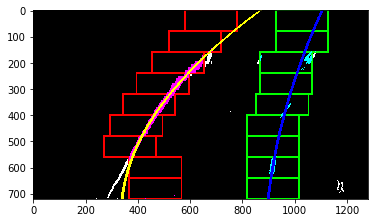

For image data/test_images\straight_lines1.jpg:
REAL WORLD: left fit curve parameters: [-1.33744848e-04  3.30256405e-03  1.71721208e+00]
REAL WORLD: right fit curve parameters: [ 1.68204641e-04 -3.84947231e-03  5.03765049e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [-4.39289573e-05  2.60337256e-02  3.24877961e+02]
PIXEL: right best-fit curve parameters: [ 5.52473952e-05 -3.03449394e-02  9.53069012e+02]
-------------------------------------------------------------------
LEFT: current radius of curvature: 3738.586793686617 m
RIGHT: current radius of curvature: 2972.7433603838394 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.0m right of center.


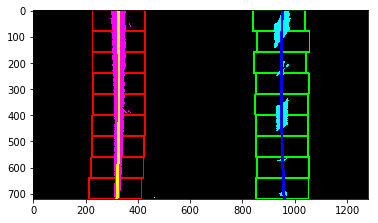

For image data/test_images\straight_lines2.jpg:
REAL WORLD: left fit curve parameters: [ 2.27178892e-04 -6.91209365e-03  1.75659800e+00]
REAL WORLD: right fit curve parameters: [-8.63789653e-06 -2.24065031e-03  5.13065443e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 7.46176916e-05 -5.44872247e-02  3.32329351e+02]
PIXEL: right best-fit curve parameters: [-2.83714695e-06 -1.76627840e-02  9.70664351e+02]
-------------------------------------------------------------------
LEFT: current radius of curvature: 2201.0577256511847 m
RIGHT: current radius of curvature: 57885.12364421545 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.02m right of center.


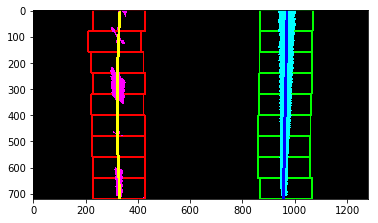

For image data/test_images\test1.jpg:
REAL WORLD: left fit curve parameters: [ 4.74348611e-04 -2.65924759e-02  2.20001476e+00]
REAL WORLD: right fit curve parameters: [ 2.81413819e-04 -2.71999855e-02  5.74662125e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 1.55801439e-04 -2.09625373e-01  4.16219009e+02]
PIXEL: right best-fit curve parameters: [ 9.24313406e-05 -2.14414300e-01  1.08719861e+03]
-------------------------------------------------------------------
LEFT: current radius of curvature: 1054.082603437538 m
RIGHT: current radius of curvature: 1777.0264661826368 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.12m right of center.


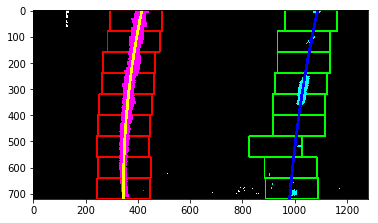

For image data/test_images\test2.jpg:
REAL WORLD: left fit curve parameters: [-6.81434649e-04  3.90906102e-02  1.44439561e+00]
REAL WORLD: right fit curve parameters: [9.97767669e-06 2.31437183e-02 4.81854593e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [-2.23819564e-04  3.08146702e-01  2.73264035e+02]
PIXEL: right best-fit curve parameters: [3.27720237e-06 1.82439221e-01 9.11616798e+02]
-------------------------------------------------------------------
LEFT: current radius of curvature: 733.7496245213789 m
RIGHT: current radius of curvature: 50154.24437905858 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.38m right of center.


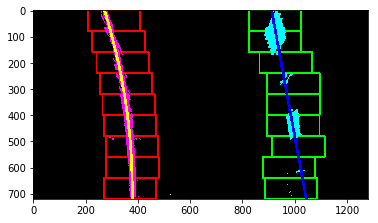

For image data/test_images\test3.jpg:
REAL WORLD: left fit curve parameters: [ 3.95598728e-04 -3.81638020e-02  2.58208205e+00]
REAL WORLD: right fit curve parameters: [ 4.47959963e-04 -3.40201623e-02  5.80848392e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 1.29935769e-04 -3.00840781e-01  4.88502009e+02]
PIXEL: right best-fit curve parameters: [ 1.47133997e-04 -2.68176955e-01  1.09890236e+03]
-------------------------------------------------------------------
LEFT: current radius of curvature: 1264.301664720803 m
RIGHT: current radius of curvature: 1116.25659305152 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.11m right of center.


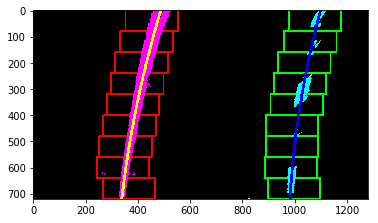

For image data/test_images\test4.jpg:
REAL WORLD: left fit curve parameters: [ 3.41725174e-04 -1.88146728e-02  2.18560870e+00]
REAL WORLD: right fit curve parameters: [ 9.30520256e-04 -4.09015425e-02  5.81828116e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 1.12240813e-04 -1.48313862e-01  4.13493538e+02]
PIXEL: right best-fit curve parameters: [ 3.05632592e-04 -3.22422070e-01  1.10075590e+03]
-------------------------------------------------------------------
LEFT: current radius of curvature: 1463.1703416085518 m
RIGHT: current radius of curvature: 537.5134794628821 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.3m right of center.


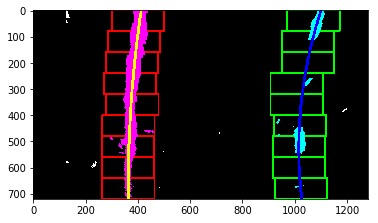

For image data/test_images\test5.jpg:
REAL WORLD: left fit curve parameters: [ 7.14187488e-04 -4.11203811e-02  2.15454586e+00]
REAL WORLD: right fit curve parameters: [ 3.18791216e-04 -2.64730726e-02  5.69101882e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 2.34577347e-04 -3.24147148e-01  4.07616784e+02]
PIXEL: right best-fit curve parameters: [ 1.04708076e-04 -2.08684131e-01  1.07667924e+03]
-------------------------------------------------------------------
LEFT: current radius of curvature: 700.0994206984865 m
RIGHT: current radius of curvature: 1568.55159129667 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.01m left of center.


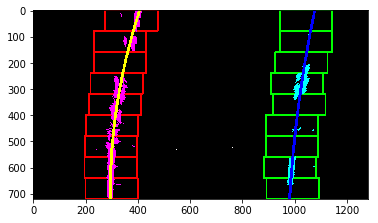

For image data/test_images\test6.jpg:
REAL WORLD: left fit curve parameters: [ 4.13010314e-04 -3.98734144e-02  2.69830994e+00]
REAL WORLD: right fit curve parameters: [ 1.06605727e-03 -4.99238587e-02  6.03254601e+00]
-------------------------------------------------------------------
PIXEL: left best-fit curve parameters: [ 1.35654664e-04 -3.14317456e-01  5.10491070e+02]
PIXEL: right best-fit curve parameters: [ 3.50150190e-04 -3.93543931e-01  1.14129249e+03]
-------------------------------------------------------------------
LEFT: current radius of curvature: 1211.037198239505 m
RIGHT: current radius of curvature: 469.1566351770156 m
-------------------------------------------------------------------
VEHICLE POSITION: 0.3m right of center.


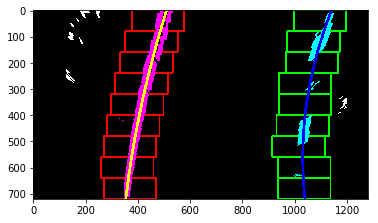

In [98]:
for _, image in enumerate(test_images):
    print('For image ' + image + ':')
    test_curve_calculation(image)

In [4]:
for _, image in enumerate(test_images):
    print('For image ' + image + ':')
    test_project_lane(image)

For image data/test_images\special_test1.jpg:


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\core\src\arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function cv::arithm_op
